In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
data = pd.read_csv('df_ca_new.csv')

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_11084\614316429.py:7: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('df_ca_new.csv')


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,1.374,1.374,1.374,1.374,0.7856,0.7856,0.7856,1.374,1.374,1.374
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1.374,1.374,1.374,1.374,0.4778,0.4778,0.4778,1.374,1.374,1.374
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1.374,1.374,1.374,1.374,0.8320,0.8320,0.8320,1.374,1.374,1.374
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1.374,1.374,1.374,1.374,8.2600,8.2600,8.2600,1.374,1.374,1.374
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,1.374,1.374,1.374,1.374,1.1620,1.1620,1.1620,1.374,1.374,1.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413203,FOODS_1_215_CA_1_validation,FOODS_1_215,FOODS_1,FOODS,CA_1,CA,d_1913,0,2016-04-24,11613,...,1.374,1.374,1.374,1.374,1.1010,1.1010,1.1010,1.374,1.374,1.374
413204,FOODS_1_216_CA_1_validation,FOODS_1_216,FOODS_1,FOODS,CA_1,CA,d_1913,1,2016-04-24,11613,...,1.374,1.374,1.374,1.374,0.7764,0.7764,0.7764,1.374,1.374,1.374
413205,FOODS_1_217_CA_1_validation,FOODS_1_217,FOODS_1,FOODS,CA_1,CA,d_1913,3,2016-04-24,11613,...,1.374,1.374,1.374,1.374,2.1040,2.1040,2.1040,1.374,1.374,1.374
413206,FOODS_1_218_CA_1_validation,FOODS_1_218,FOODS_1,FOODS,CA_1,CA,d_1913,6,2016-04-24,11613,...,1.374,1.374,1.374,1.374,11.7000,11.7000,11.7000,1.374,1.374,1.374


Train RMSE: 2.6675212944113817
Test RMSE: 2.4070793828953296


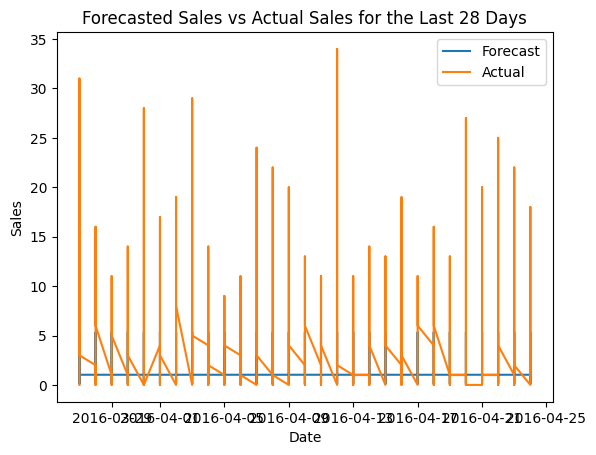

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Step 1: Preprocess the dataset to handle missing values
# Let's impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
data[['sell_price']] = imputer.fit_transform(data[['sell_price']])  # Notice the double brackets around 'sell_price'


# Step 2: Prepare the dataset for time series forecasting
# Convert 'd' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Step 3: Split the dataset into training and testing sets
# Assuming the last 28 days are for prediction
train = data[data['date'] < data['date'].max() - pd.Timedelta(days=28)]
test = data[data['date'] >= data['date'].max() - pd.Timedelta(days=28)]

# Step 4: Choose and train a machine learning model
# Random Forest Regressor is chosen for demonstration
features = ['dept_id', 'cat_id', 'store_id', 'state_id', 'sell_price']
target = 'sold'

X_train, X_test = train[features], test[features]
y_train, y_test = train[target], test[target]
X_train = pd.get_dummies(X_train, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])
X_test = pd.get_dummies(X_test, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


# Step 6: Visualize the results of test predictions
plt.plot(test['date'], test_pred, label='Forecast')
plt.plot(test['date'], y_test, label='Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecasted Sales vs Actual Sales for the Last 28 Days')
plt.legend()
plt.show()
